<a href="https://colab.research.google.com/github/onishchenkoar/isl/blob/main/ISLR%2C_Chapter_2%2C_exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 56:
> This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set()
%matplotlib inline

In [24]:
auto = pd.read_csv('https://www.statlearning.com/s/Auto.csv', index_col=0)
auto = auto[auto != '?'].dropna().reset_index()
auto.horsepower = auto.horsepower.astype(np.int16)
auto.origin = auto.origin.astype('category')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Columns:
1. `mpg` &mdash; miles per gallon.
1. `cylinders` &mdash; number of cylinders between 4 and 8.
1. `displacement` &mdash; engine displacement (cu. inches).
1. `horsepower` &mdash; engine horsepower.
1. `weight` &mdash; vehicle weight (lbs.).
1. `acceleration` &mdash; time to accelerate from 0 to 60 mph (sec.).
1. `year` &mdash; model year (modulo 100).
1. `origin` &mdash; origin of car (1. American, 2. European, 3. Japanese)
1. `name` &mdash; vehicle name.


# (a)

From the textbook, p. 56:
> Which of the predictors are quantitative, and which are qualitative?

In [25]:
auto.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
dtype: int64

Strictly qualitative are `origin` and `name`. Depending on how you look at it, you might consider `cylinder` and `year` as qualitative (because of their low cardinality).

# (b)

From the textbook, p. 56:
> What is the range of each quantitative predictor? You can answer this using the `range()` function.

In [26]:
auto_quan = auto.drop(['origin', 'name'], axis=1)

print('Quantitative min'
      , auto_quan.min()
      , '\nQuantitative max'
      , auto_quan.max()
      , sep='\n'
     )

Quantitative min
mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
dtype: float64

Quantitative max
mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
dtype: float64


# (c)

From the textbook, p. 56::
> What is the mean and standard deviation of each quantitative
predictor?

In [27]:
print('Quantitative mean'
      , auto_quan.mean()
      , '\nQuantitative std'
      , auto_quan.std()
      , sep='\n'
     )

Quantitative mean
mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

Quantitative std
mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


# (d)

From the textbook, p. 56:
> Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [28]:
auto_quan_sample = auto_quan.drop(np.arange(10, 86))
print('Quantitative min'
      , auto_quan.min()
      , '\nQuantitative max'
      , auto_quan.max()
      , '\nQuantitative mean'
      , auto_quan.mean()
      , '\nQuantitative std'
      , auto_quan.std()
      , sep='\n'
     )

Quantitative min
mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
dtype: float64

Quantitative max
mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
dtype: float64

Quantitative mean
mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

Quantitative std
mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


# (e)

From the textbook, p. 56:
> Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

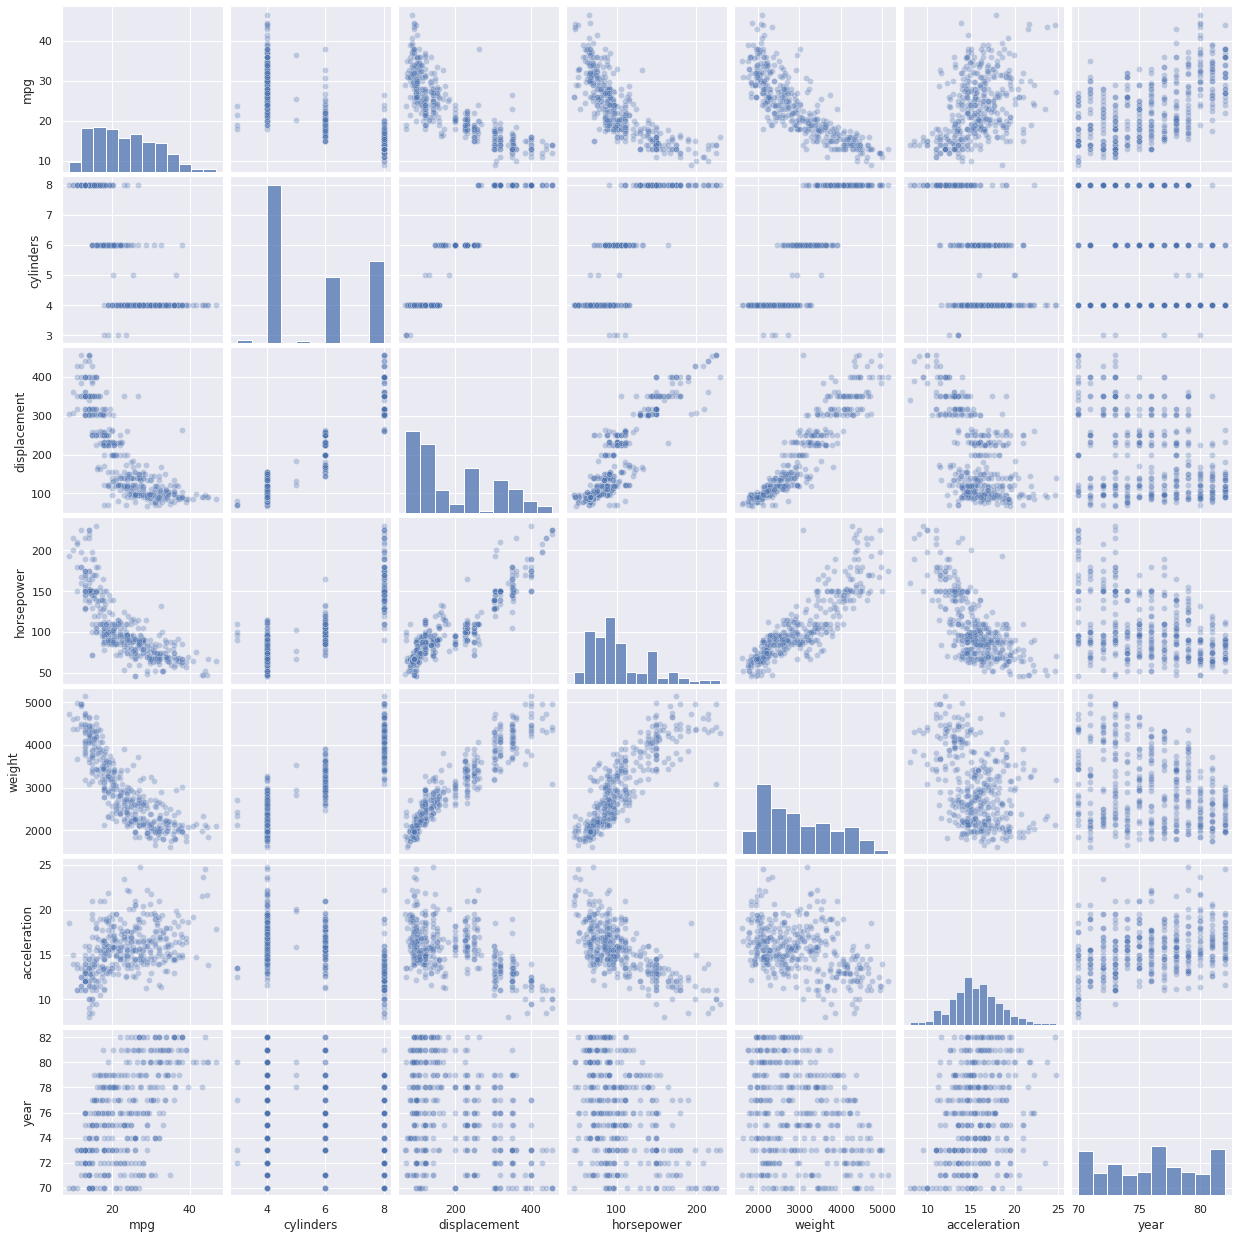

In [31]:
sns.pairplot(auto, plot_kws={'alpha' : 0.3})

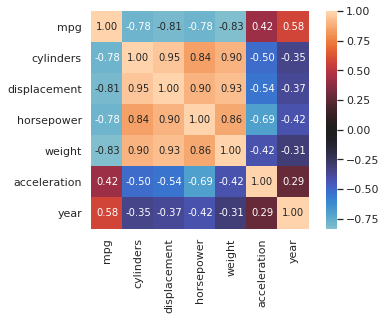

In [30]:
sns.heatmap(auto.corr()
            , center=0.0
            , annot=True
            , fmt='.2f'
            , square=True
            , cmap=sns.color_palette('icefire', as_cmap=True))

`cylinders`, `displacement`, `horsepower`, `weight` &mdash; all strongly correlated. This is reasonable: a heavier car needs more powerful engine, which needs to burn more fuel, which leads to more cylinders, and displacement is a total volume of all cylinders.

Couple of noticable negative correlations:
* `weight` - `mpg` &mdash; the heavier the car, the less fuel-efficient it is),
* `horsepower` - `acceleration` &mdash; the more powerful the engine, the less time it takes to accelerate.

# (f)

From the textbook, p. 56:
> Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

`mpg` is strongly correlated with `cylinders`, `displacement`, `horsepower`, `weight` and moderately correlated with `year`. `cylinders`, `displacement`, `horsepower`, `weight` are also strongly correlated between themselves. I would use `weight`, and `year` as two more or less independent predictors.